In [1]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment I_class_LKG.xlsx');
df2 = pd.read_excel('Formative Assessment-2_class_LKG.xlsx');
df3 = pd.read_excel('Half Yearly Exam_class_LKG.xlsx');

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2022-2023,Formative Assessment I,Offline,Maths,Evaluating,25,7,0 %,Abhik Upadhya,Nursery,A,18,8.0,Pass
1,2022-2023,Formative Assessment I,Offline,Oral Maths,Evaluating,10,3,0 %,Abhik Upadhya,Nursery,A,18,8.0,Pass
2,2022-2023,Formative Assessment I,Offline,Rhymes,Evaluating,25,7,0 %,Abhik Upadhya,Nursery,A,18,24.0,Pass
3,2022-2023,Formative Assessment I,Offline,English,Evaluating,25,7,0 %,Abhik Upadhya,Nursery,A,18,10.5,Pass
4,2022-2023,Formative Assessment I,Offline,Oral English,Evaluating,10,3,0 %,Abhik Upadhya,Nursery,A,18,8.0,Pass


In [3]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [4]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new

,Student Name,Class,Section,Roll No
0,Abhik Upadhya,Nursery,A,18.0
1,Eric Sharma,LKG,A,1.0
2,Manab Mukherjee,LKG,A,2.0
3,Prince Sonar,LKG,A,3.0
4,Saurav Kumar,LKG,A,4.0
5,Hriday Das,LKG,A,6.0
6,Yesh Raj Rai,LKG,A,7.0
7,Yamini Kataky,LKG,A,8.0
8,Riman Ali Mandal,LKG,A,9.0
9,Joy Chakrabarty,LKG,A,10.0


In [5]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;


df_new

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Oral Maths,Formative Assessment I_Rhymes,Formative Assessment I_English,Formative Assessment I_Oral English,Formative Assessment I_Drawing,...,Formative Assessment-2_Rhymes,Formative Assessment-2_English,Formative Assessment-2_Oral English,Formative Assessment-2_Drawing,Half Yearly Exam_Maths,Half Yearly Exam_Oral Maths,Half Yearly Exam_Rhymes,Half Yearly Exam_English,Half Yearly Exam_Oral English,Half Yearly Exam_Drawing
0,Abhik Upadhya,Nursery,A,18.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Eric Sharma,LKG,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manab Mukherjee,LKG,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Prince Sonar,LKG,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Saurav Kumar,LKG,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Hriday Das,LKG,A,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Yesh Raj Rai,LKG,A,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Yamini Kataky,LKG,A,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Riman Ali Mandal,LKG,A,9.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Joy Chakrabarty,LKG,A,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Oral Maths,Formative Assessment I_Rhymes,Formative Assessment I_English,Formative Assessment I_Oral English,Formative Assessment I_Drawing,...,Formative Assessment-2_Rhymes,Formative Assessment-2_English,Formative Assessment-2_Oral English,Formative Assessment-2_Drawing,Half Yearly Exam_Maths,Half Yearly Exam_Oral Maths,Half Yearly Exam_Rhymes,Half Yearly Exam_English,Half Yearly Exam_Oral English,Half Yearly Exam_Drawing
0,Abhik Upadhya,Nursery,A,18.0,8,8,24,10.5,8,18,...,0,24.5,10,0,0,0,0,0.0,0,0
1,Eric Sharma,LKG,A,1.0,19,10,15,13.0,5,18,...,15,19.0,5,12,20,15,15,22.0,0,16
2,Manab Mukherjee,LKG,A,2.0,18,9,25,17.0,6,20,...,24,11.0,10,17,44,25,50,31.0,28,35
3,Prince Sonar,LKG,A,3.0,12,7,23,6.0,5,20,...,23,10.0,7,17,27,21,48,14.5,15,25
4,Saurav Kumar,LKG,A,4.0,19,10,25,22.0,10,20,...,25,24.0,10,18,15,27,0,0.0,0,0


In [7]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Oral Maths,Formative Assessment I_Rhymes,Formative Assessment I_English,Formative Assessment I_Oral English,Formative Assessment I_Drawing,...,Half Yearly Exam_Rhymes,Half Yearly Exam_English,Half Yearly Exam_Oral English,Half Yearly Exam_Drawing,Weightage Maths,Weightage Oral Maths,Weightage Rhymes,Weightage English,Weightage Oral English,Weightage Drawing
0,Abhik Upadhya,Nursery,A,18.0,8,8,24,10.5,8,18,...,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Eric Sharma,LKG,A,1.0,19,10,15,13.0,5,18,...,15,22.0,0,16,NaN,NaN,NaN,NaN,NaN,NaN
2,Manab Mukherjee,LKG,A,2.0,18,9,25,17.0,6,20,...,50,31.0,28,35,NaN,NaN,NaN,NaN,NaN,NaN
3,Prince Sonar,LKG,A,3.0,12,7,23,6.0,5,20,...,48,14.5,15,25,NaN,NaN,NaN,NaN,NaN,NaN
4,Saurav Kumar,LKG,A,4.0,19,10,25,22.0,10,20,...,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Calculate the weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
for subject in subjects:
    df_new['Weightage ' + subject] = df_new['Formative Assessment I_' + subject] * 0.4 + df_new['Formative Assessment-2_' + subject] * 0.4 + df_new['Half Yearly Exam_' + subject] * 0.8;

In [9]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30 else fail
for subject in subjects:
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= 30, 'Pass', 'Fail');

In [10]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Oral Maths,Formative Assessment I_Rhymes,Formative Assessment I_English,Formative Assessment I_Oral English,Formative Assessment I_Drawing,...,Weightage English,Weightage Oral English,Weightage Drawing,Result Maths,Result Oral Maths,Result Rhymes,Result English,Result Oral English,Result Drawing,Total Weightage
0,Abhik Upadhya,Nursery,A,18.0,8,8,24,10.5,8,18,...,14.0,7.2,7.2,Fail,Fail,Fail,Fail,Fail,Fail,44.4
1,Eric Sharma,LKG,A,1.0,19,10,15,13.0,5,18,...,30.4,4.0,24.8,Pass,Fail,Fail,Pass,Fail,Fail,133.2
2,Manab Mukherjee,LKG,A,2.0,18,9,25,17.0,6,20,...,36.0,28.8,42.8,Pass,Fail,Pass,Pass,Fail,Pass,244.8
3,Prince Sonar,LKG,A,3.0,12,7,23,6.0,5,20,...,18.0,16.8,34.8,Fail,Fail,Pass,Fail,Fail,Pass,177.6
4,Saurav Kumar,LKG,A,4.0,19,10,25,22.0,10,20,...,18.4,8.0,15.2,Fail,Fail,Fail,Fail,Fail,Fail,118.8


In [11]:
# Add a result column
df_new['Result'] = '';

# Count the no of subjects
no_of_subjects = len(subjects);

# Total full marks
total_full_marks = no_of_subjects * 100;

# Add the total marks column
df_new['Total Marks'] = total_full_marks;

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] > total_full_marks * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] <= total_full_marks * 0.3, 'Result'] = 'Fail';

In [12]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False);

In [13]:
# Print the first row
df_new.iloc[0]

Student Name                           Abhik Upadhya
Class                                        Nursery
Section                                            A
Roll No                                         18.0
Formative Assessment I_Maths                       8
Formative Assessment I_Oral Maths                  8
Formative Assessment I_Rhymes                     24
Formative Assessment I_English                  10.5
Formative Assessment I_Oral English                8
Formative Assessment I_Drawing                    18
Formative Assessment-2_Maths                       0
Formative Assessment-2_Oral Maths                  0
Formative Assessment-2_Rhymes                      0
Formative Assessment-2_English                  24.5
Formative Assessment-2_Oral English               10
Formative Assessment-2_Drawing                     0
Half Yearly Exam_Maths                             0
Half Yearly Exam_Oral Maths                        0
Half Yearly Exam_Rhymes                       

In [14]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment I_Maths,Formative Assessment I_Oral Maths,Formative Assessment I_Rhymes,Formative Assessment I_English,Formative Assessment I_Oral English,Formative Assessment I_Drawing,...,Result Oral Maths,Result Rhymes,Result English,Result Oral English,Result Drawing,Total Weightage,Result,Total Marks,Percentage,Rank
0,Abhik Upadhya,Nursery,A,18.0,8,8,24,10.5,8,18,...,Fail,Fail,Fail,Fail,Fail,44.4,Fail,600,7.400000,12.0
1,Eric Sharma,LKG,A,1.0,19,10,15,13.0,5,18,...,Fail,Fail,Pass,Fail,Fail,133.2,Fail,600,22.200000,10.0
2,Manab Mukherjee,LKG,A,2.0,18,9,25,17.0,6,20,...,Fail,Pass,Pass,Fail,Pass,244.8,Pass,600,40.800000,3.0
3,Prince Sonar,LKG,A,3.0,12,7,23,6.0,5,20,...,Fail,Pass,Fail,Fail,Pass,177.6,Fail,600,29.600000,8.0
4,Saurav Kumar,LKG,A,4.0,19,10,25,22.0,10,20,...,Fail,Fail,Fail,Fail,Fail,118.8,Fail,600,19.800000,11.0
5,Hriday Das,LKG,A,6.0,10,10,25,21.0,10,20,...,Fail,Pass,Pass,Fail,Pass,214.8,Pass,600,35.800000,6.0
6,Yesh Raj Rai,LKG,A,7.0,25,10,25,0.0,10,21,...,Pass,Pass,Pass,Pass,Pass,265.6,Pass,600,44.266667,2.0
7,Yamini Kataky,LKG,A,8.0,24,10,25,24.0,10,23,...,Pass,Pass,Pass,Pass,Pass,285.6,Pass,600,47.600000,1.0
8,Riman Ali Mandal,LKG,A,9.0,10,6,25,5.0,5,18,...,Fail,Pass,Fail,Fail,Pass,192.8,Pass,600,32.133333,7.0
9,Joy Chakrabarty,LKG,A,10.0,14,5,25,19.0,7,19,...,Fail,Pass,Pass,Fail,Pass,242.8,Pass,600,40.466667,4.0


In [15]:
# Export the dataframe to excel
df_new.to_excel('Result.xlsx', index=False);

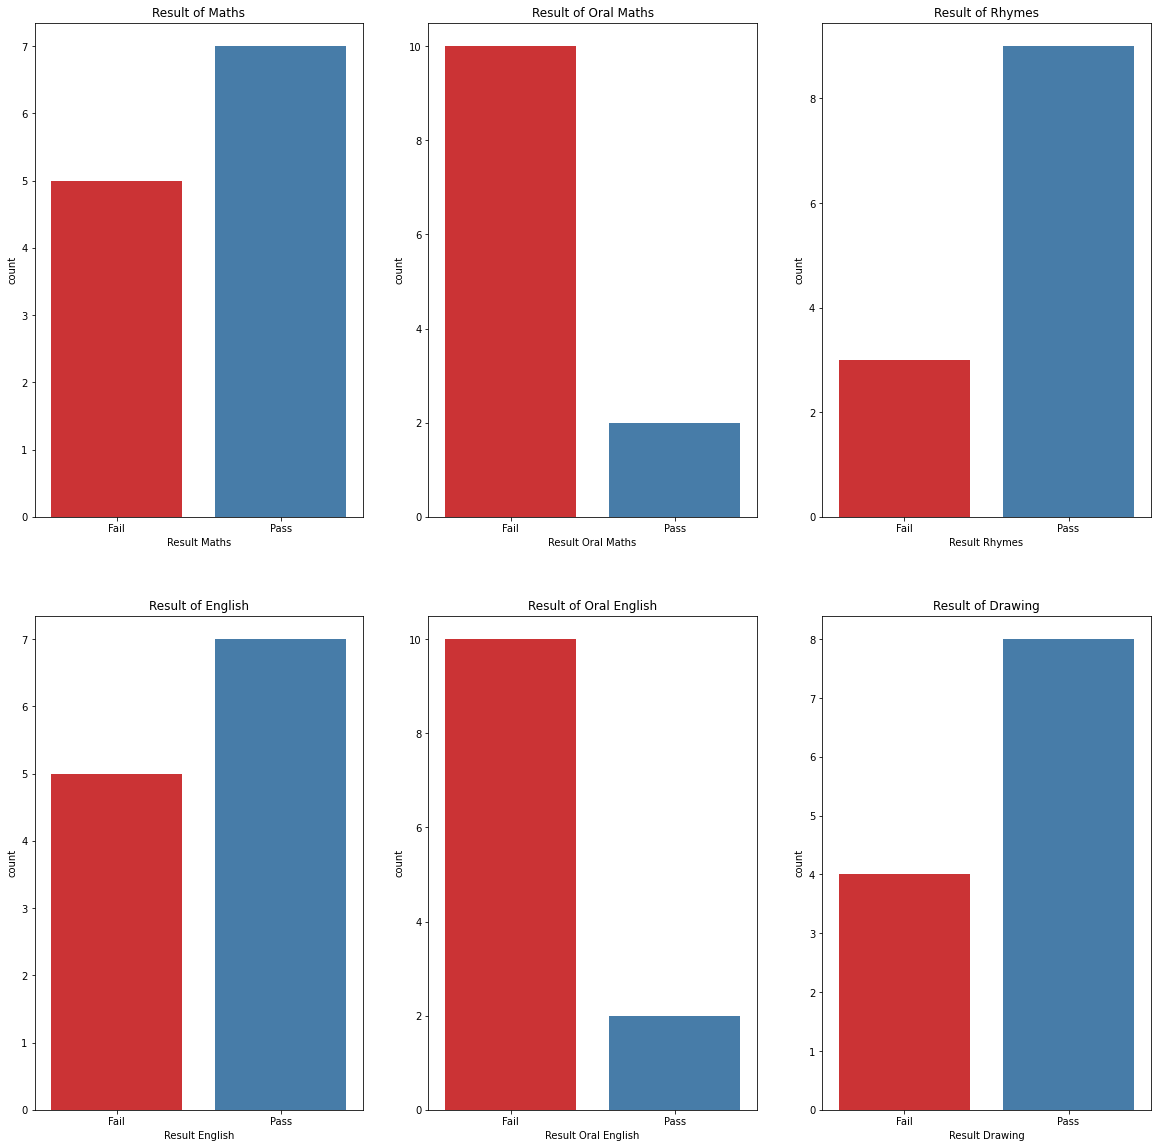

In [16]:
# Combine the charts in one figure
fig, axes = plt.subplots(2, 3, figsize=(20, 20));
for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
    axes[i // 3, i % 3].set_title('Result of ' + subject);
plt.show();